# Lab 02: Probability, Distributions, and Statistical Questions
## Problem 1

- In the hypothetical telescope I'm using, there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, I am asking what is the probability that the cosmic-ray background would have given me a measurement as signal-like or more than the signal that you received.
  - I assume that in 1 day, the average cosmic-ray background labelled $\lambda_X$, which is equal to 3
  - I also assume that in 1 day, the average amount of gamma particles emitted from this source is labelled $\lambda_Y$, which is equal to 8
    - So I want to know what the probability is that the background Poisson distribution would give me a signal that is greater than or equal to my measurement of $\lambda_Y=8$
- I can define the general equation for a Poisson Distribution (P) as follows:
  - $P(x;\lambda) = e^{-\lambda}\lambda^{x} / x!$
  - Where:
    - x = some possible measurement of number of occurences of a specific event when those events occur independently at a constant rate
    - $\lambda$ = the average number of occurences
- First, I want to show how the Poisson-distributed background over a single observation period where the background has the $\lambda$ value of 3 that I previously chose

In [1]:
# Finch's Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import random
%matplotlib inline

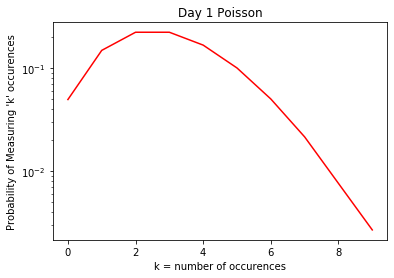

In [6]:
# Let's plot a Day-1 Poisson Distribution
fig, ax = plt.subplots(1,1)
plt.yscale('log')
lamX = muX = 3
k = np.sort(stats.poisson.rvs(mu=muX, size=100))

Poisson1 = stats.poisson.pmf(k, mu=muX)
ax.plot(k, Poisson1, 'r-', ms=8, label='Poisson PMF')
plt.xlabel('k = number of occurences')
plt.ylabel('Probability of Measuring \'k\' occurences')
plt.title('Day 1 Poisson')
plt.show()

- Above I can see the Poisson distribution with a $\lambda = 3$ for one observation period with 
  - NOTE: The variance in any Poisson distribution is also equal to $\lambda$
  - From my research I know that convolving two probability mass functions will give the PMF of their sum, but I don't want the sum of their PMFs, I want the average PMF over a set amount of days (in this case 5 days (or 5 observation periods))
  - I also find in my research that the $\lambda_{sum}$ for two independent Poisson distributions $\lambda_X$ and $\lambda_Y$ can be found using the following relation:
    - $\lambda_{sum} = \lambda_X + \lambda_Y$
    - So if I assume that each observation period is independent of the previous and future periods, then I know that each observation period will have a $\lambda_{individual}$ of 3, my assumed emission occurence average of the background
    - Therefore the $\lambda_{5\ day\ sum}$ is equal to 5 days * mean of 3 each day, which is equal to 15
- Let's show the distribution summed after 5 days

In [13]:
# Day5 = 4
# for i in range(Day5):
#    if i == 0:
#        k = np.sort(stats.poisson.rvs(mu=lamdaX, size=1000))
#        PoissonA = stats.poisson.pmf(k, muX)
#        Poisson5 = np.convolve(PoissonA, PoissonA, mode='full')
#    else:
#        k5 = np.sort(stats.poisson.rvs(mu=muX*(i+1), size=len(Poisson5)))
#        PoissonA = stats.poisson.pmf(k, muX)
#        Poisson5 = np.convolve(PoissonA, Poisson5, mode='full')

# Convolving each day's distribution one by one:     
Poisson2 = np.convolve(Poisson1, Poisson1, mode='full')
Poisson3 = np.convolve(Poisson2, Poisson1, mode='full')
Poisson4 = np.convolve(Poisson3, Poisson1, mode='full')
BPoisson5 = np.convolve(Poisson4, Poisson1, mode='full')
len(BPoisson5), len(Poisson5)
## LENGTHS ARE DIFFERENT, WHY?????

(496, 4996)

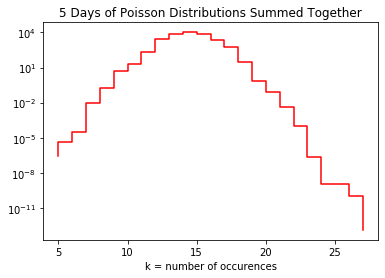

In [17]:
#DO I USE BPOISSON5 OR POISSON5 FOR K VALUES
fig, ax = plt.subplots(1,1)
plt.yscale('log')
muX = 3
# Create a new x-axis of occurences over 5 day average?????
k5 = np.sort(stats.poisson.rvs(mu=5*muX, size=len(BPoisson5)))


# Plot a standard Poisson Distribution with a mu of 15
## ax.plot(k5, stats.poisson.pmf(k5, mu=15), label='Poisson Fit')

# Plot the Poisson Distribution averaged over 5 observing days
ax.step(k5, BPoisson5, 'r-', ms=8, label='Poisson PMF')
plt.xlabel('k = number of occurences')
plt.title('5 Days of Poisson Distributions Summed Together')
plt.show()

- As we sum over more and more days, the mean becomes larger and larger, and the distribution becomes more and more normalized
- The lower bound stays at zero on the 5-day average, but the upper bound becomes larger after each convolution
- The Poisson distributions from 5 different observation periods can still be described as a Poisson from the following mathematical explanation:
$\begin{align*}
  P(X+ Y =k) &= \sum_{i = 0}^k P(X+ Y = k, X = i)\\
    &= \sum_{i=0}^k P(Y = k-i , X =i)\\
    &= \sum_{i=0}^k P(Y = k-i)P(X=i)\\
    &= \sum_{i=0}^k e^{-\mu}\frac{\mu^{k-i}}{(k-i)!}e^{-\lambda}\frac{\lambda^i}{i!}\\
   &= e^{-(\mu + \lambda)}\frac 1{k!}\sum_{i=0}^k \frac{k!}{i!(k-i)!}\mu^{k-i}\lambda^i\\
   &= e^{-(\mu + \lambda)}\frac 1{k!}\sum_{i=0}^k \binom ki\mu^{k-i}\lambda^i\\
   &= \frac{(\mu + \lambda)^k}{k!} \cdot e^{-(\mu + \lambda)}
\end{align*}$

  - Where I define $X$ as my Day 1 and $Y$ is my Day 2, and $X$ has a mean of $\lambda$ and $Y$ has a mean of $\mu$; We repeated this proof in our convolutions with Day 2 and Day 3, etc. until we had a sum for 5 observation periods with a mean $\lambda_5$ equal to $\sum_{i=1}^5 \lambda_i$
    - NOTE: This proof is only applicable because I consider my individual observation periods to be independent of one another